# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [1]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the libraries
import numpy as np
import pandas as pd

### **1.1 Load the Data**

In [3]:
# Load the dataset
df = pd.read_csv("Employee_data.csv")

In [4]:
# Check the first few entries
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


In [5]:
# Inspect the shape of the dataset
df.shape

(74610, 24)

In [6]:
# Inspect the different columns in the dataset
df.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

### **1.2 Check the basic statistics**

In [7]:
# Check the summary of the dataset
df.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months)
count,74610.000000,74610.000000,74610.000000,74610.000000,74610.000000,72698.000000,74610.000000,72197.000000
mean,37246.028696,38.529379,15.722638,7344.931417,0.832958,49.990839,1.657432,55.711899
std,21505.785344,12.082299,11.224059,2596.373589,0.995326,28.519135,1.579862,25.392325
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18624.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37239.500000,39.000000,13.000000,7348.500000,1.000000,50.000000,1.000000,56.000000
75%,55871.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,50030.000000,4.000000,99.000000,15.000000,128.000000


### **1.3 Check the data type of columns**

In [8]:
# Check the info to see the types of the feature variables and the null values present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [9]:
# Check the number of missing values in each column
df.isnull().sum()

,0
Employee ID,0
Age,0
Gender,0
Years at Company,0
Job Role,0
Monthly Income,0
Work-Life Balance,0
Job Satisfaction,0
Performance Rating,0
Number of Promotions,0


2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [10]:
# Check the percentage of missing values in each column
round(100*(df.isnull().sum()/len(df.index)), 2)

,0
Employee ID,0.00
Age,0.00
Gender,0.00
Years at Company,0.00
Job Role,0.00
Monthly Income,0.00
Work-Life Balance,0.00
Job Satisfaction,0.00
Performance Rating,0.00
Number of Promotions,0.00


2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [11]:
# Handle the missing value rows in the column

# only 2 columns have missing values and both are numerical columns, so replacing missing values with median.
df['Company Tenure (In Months)'].fillna(df['Company Tenure (In Months)'].median(), inplace= True)
df['Distance from Home'].fillna(df['Distance from Home'].median(), inplace= True)

2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [12]:
# Check the percentage of remaining data after missing values are removed
round(100*(df.isnull().sum()/len(df.index)), 2)

,0
Employee ID,0.0
Age,0.0
Gender,0.0
Years at Company,0.0
Job Role,0.0
Monthly Income,0.0
Work-Life Balance,0.0
Job Satisfaction,0.0
Performance Rating,0.0
Number of Promotions,0.0


### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [13]:
# Write a function to display the categorical columns with their unique values and check for redundant values
def display_categorical_info(df):
     categorical_columns = df.select_dtypes(include=['object', 'category']).columns
     for col in categorical_columns:
        print(f"\nColumn: {col}")
        unique_vals = df[col].dropna().unique()
        print("Unique values:", unique_vals)

In [14]:
# Check the data
display_categorical_info(df)


Column: Gender
Unique values: ['Male' 'Female']

Column: Job Role
Unique values: ['Education' 'Media' 'Healthcare' 'Technology' 'Finance']

Column: Work-Life Balance
Unique values: ['Excellent' 'Poor' 'Good' 'Fair']

Column: Job Satisfaction
Unique values: ['Medium' 'High' 'Very High' 'Low']

Column: Performance Rating
Unique values: ['Average' 'Low' 'High' 'Below Average']

Column: Overtime
Unique values: ['No' 'Yes']

Column: Education Level
Unique values: ['Associate Degree' 'Masterâ€™s Degree' 'Bachelorâ€™s Degree'
 'High School' 'PhD']

Column: Marital Status
Unique values: ['Married' 'Divorced' 'Single']

Column: Job Level
Unique values: ['Mid' 'Senior' 'Entry']

Column: Company Size
Unique values: ['Medium' 'Small' 'Large']

Column: Remote Work
Unique values: ['No' 'Yes']

Column: Leadership Opportunities
Unique values: ['No' 'Yes']

Column: Innovation Opportunities
Unique values: ['No' 'Yes']

Column: Company Reputation
Unique values: ['Excellent' 'Fair' 'Poor' 'Good']

Column

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [15]:
# Drop redundant columns which are not required for modelling
df['Education Level'] = df['Education Level'].replace('Masterâ€™s Degree', 'Masters Degree')
df['Education Level'] = df['Education Level'].replace('Bachelorâ€™s Degree', 'Bachelors Degree')

# Look at 14th column, age is 47, years at company is 38, means started working at company since age 9, which is impossible. So dropping 'years at company' column.
Redundant_column= ['Employee ID','Years at Company']
df= df.drop(Redundant_column,axis=1)

In [16]:
# Check first few rows of data
df.head()

,Age,Gender,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,Education,5390,Excellent,Medium,Average,2,No,22.0,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,59,Female,Media,5534,Poor,High,Low,3,No,21.0,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,24,Female,Healthcare,8159,Good,High,Low,0,No,11.0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,36,Female,Education,3989,Good,High,High,1,No,27.0,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,56,Male,Education,4821,Fair,Very High,Average,0,Yes,71.0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [17]:
# Import Train Test Split
from sklearn.model_selection import train_test_split

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [18]:
# Put all the feature variables in X
X = df.drop(['Attrition'], axis=1)
# Put the target variable in y
y = df['Attrition']

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [19]:
# Split the data into 70% train data and 30% validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [20]:
# Select numerical columns
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['Age', 'Monthly Income', 'Number of Promotions', 'Distance from Home',
       'Number of Dependents', 'Company Tenure (In Months)'],
      dtype='object')

4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

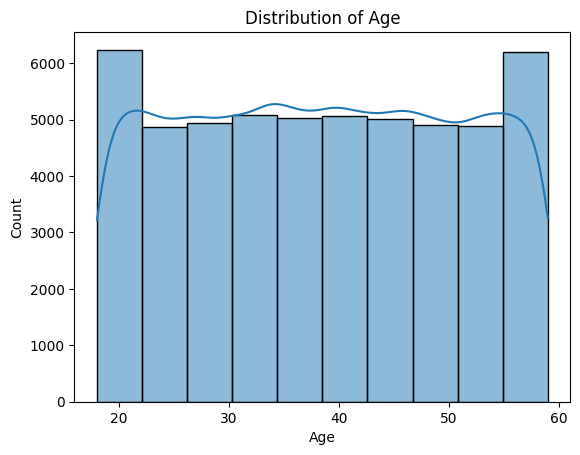

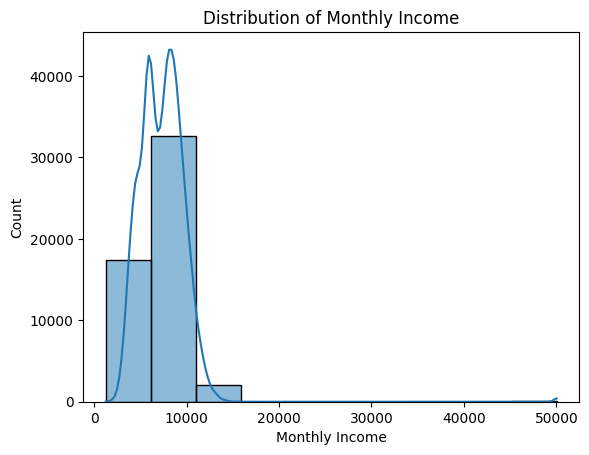

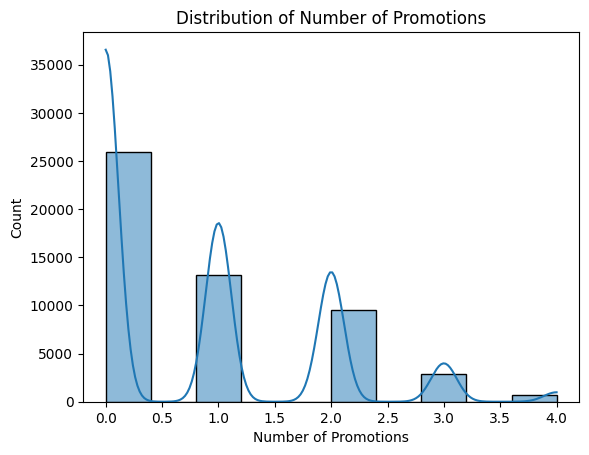

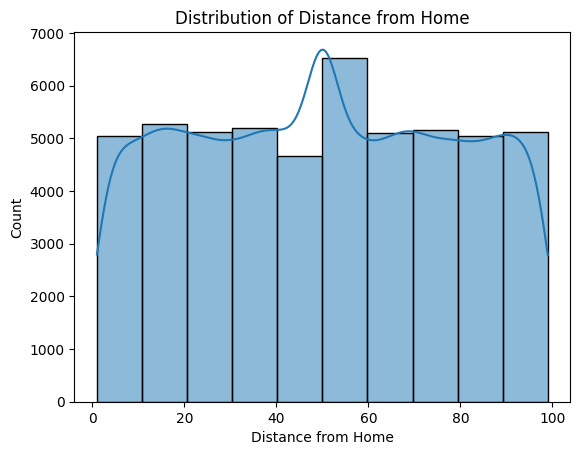

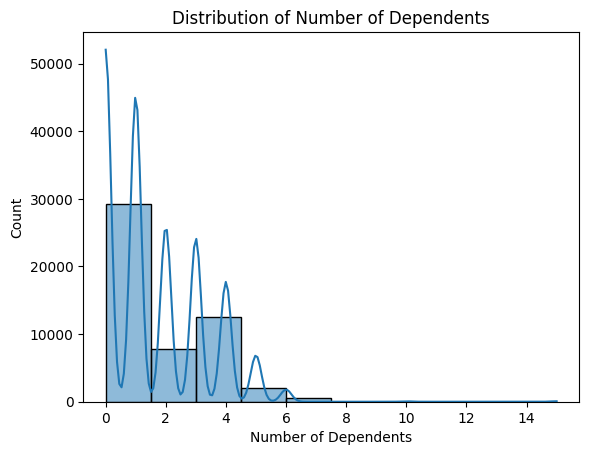

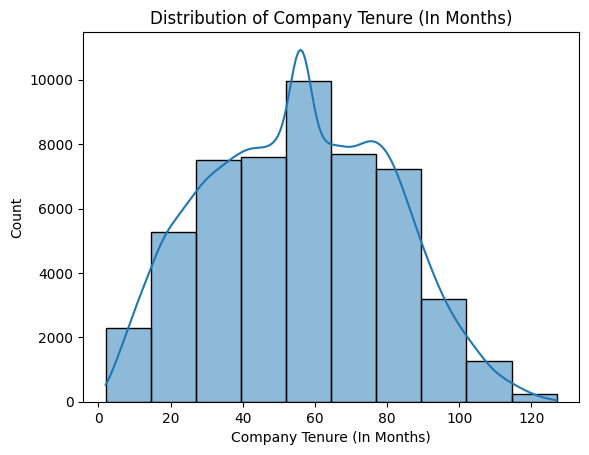

In [21]:
# Plot all the numerical columns to understand their distribution

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_columns:
    sns.histplot(X_train[col], bins=10, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [22]:
Train_numerical= X_train.describe(percentiles=[.25, .5, .75, .90, .95, .99])
Train_numerical

,Age,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months)
count,52227.000000,52227.000000,52227.000000,52227.000000,52227.000000,52227.000000
mean,38.484156,7346.678806,0.834741,49.933712,1.651502,55.628315
std,12.075971,2594.502903,0.994746,28.146227,1.578733,24.892620
min,18.000000,1253.000000,0.000000,1.000000,0.000000,2.000000
25%,28.000000,5658.500000,0.000000,26.000000,0.000000,36.000000
50%,38.000000,7349.000000,1.000000,50.000000,1.000000,56.000000
75%,49.000000,8871.000000,2.000000,74.000000,3.000000,75.000000
90%,55.000000,10101.000000,2.000000,89.000000,4.000000,88.000000
95%,57.000000,10818.700000,3.000000,94.000000,5.000000,96.000000
99%,59.000000,12222.740000,4.000000,98.000000,6.000000,110.000000


### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

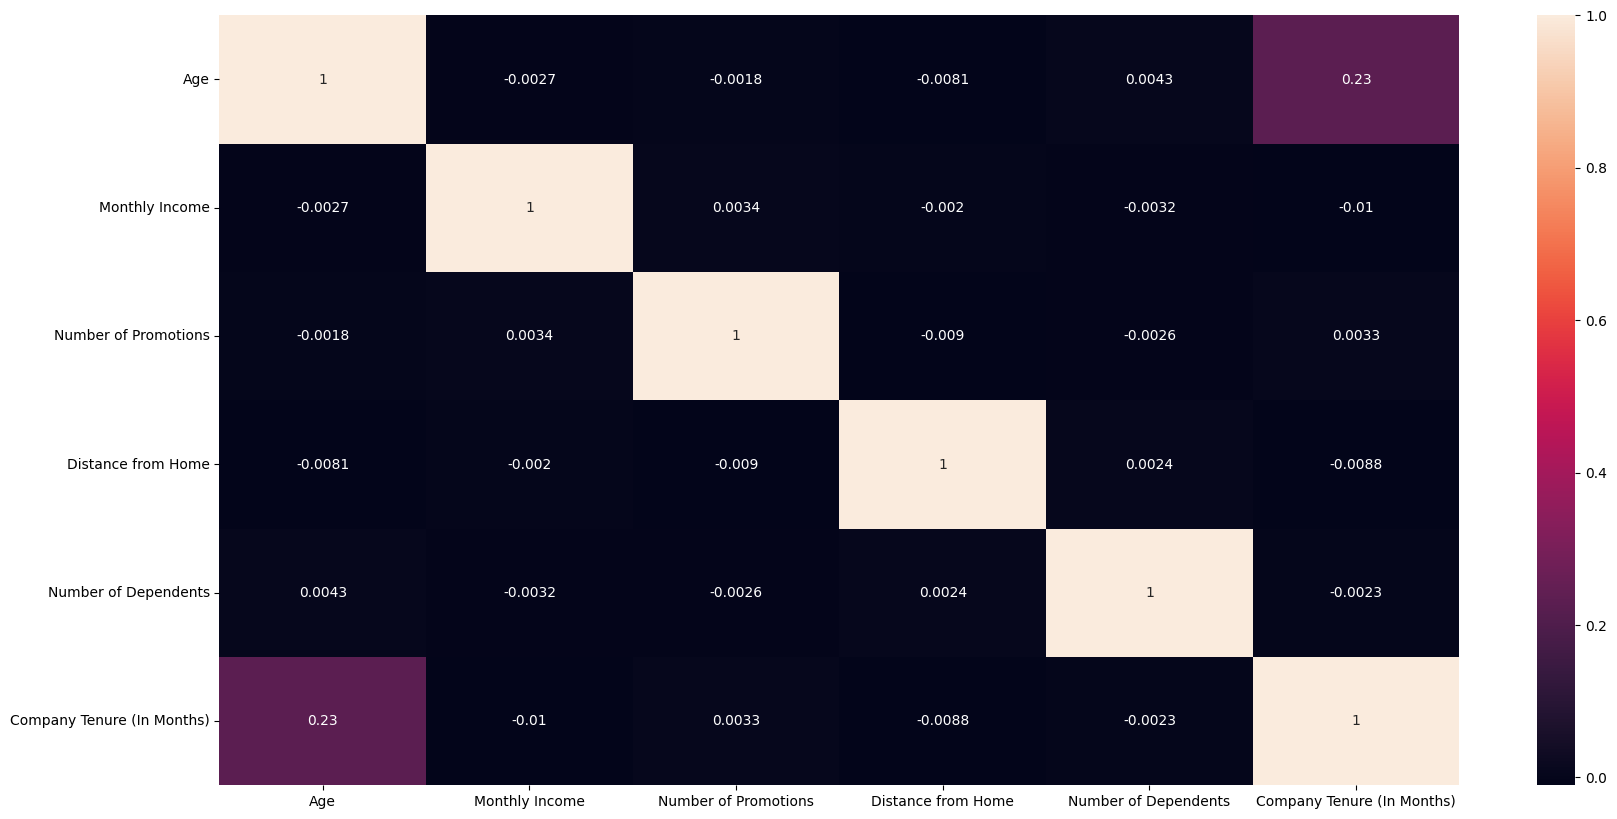

In [23]:
# Create correlation matrix for numerical columns
# X_train[numerical_columns].corr()
# Plot Heatmap of the correlation matrix
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train[numerical_columns].corr(), annot = True)
plt.show()

# Age and Company Tenure in months columns have significant correlation although not considerable.

### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

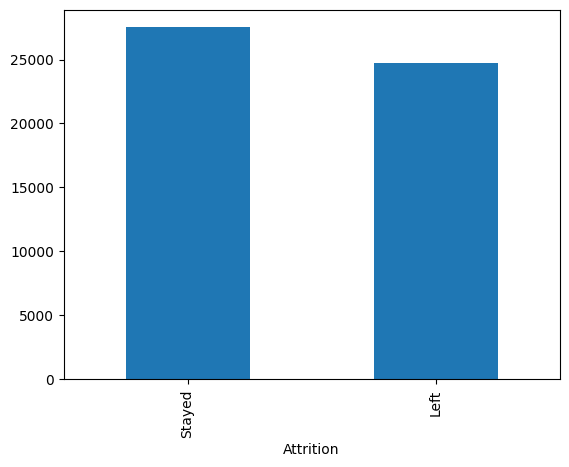

In [24]:
# Plot a bar chart to check class balance
y_train.value_counts().plot(kind='bar')
plt.show()

# we have balance y_train with almost equal values for both categories.

### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

In [25]:
df_train = X_train
df_train['Attrition'] = y_train
df_train.head()

,Age,Gender,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
67016,23,Female,Healthcare,7050,Fair,Very High,Average,0,No,95.0,...,3,Mid,Medium,13.0,No,No,No,Excellent,Medium,Left
9437,57,Female,Healthcare,8429,Good,Medium,Average,0,No,90.0,...,4,Mid,Medium,34.0,No,No,No,Poor,Low,Stayed
52439,34,Male,Media,7338,Fair,High,High,1,No,2.0,...,1,Senior,Medium,93.0,Yes,No,No,Good,High,Stayed
32387,49,Male,Finance,10099,Fair,High,Average,0,No,3.0,...,1,Entry,Medium,56.0,No,No,No,Good,High,Left
62365,59,Female,Healthcare,6843,Good,High,Average,0,No,25.0,...,3,Mid,Medium,31.0,Yes,No,No,Good,Low,Stayed


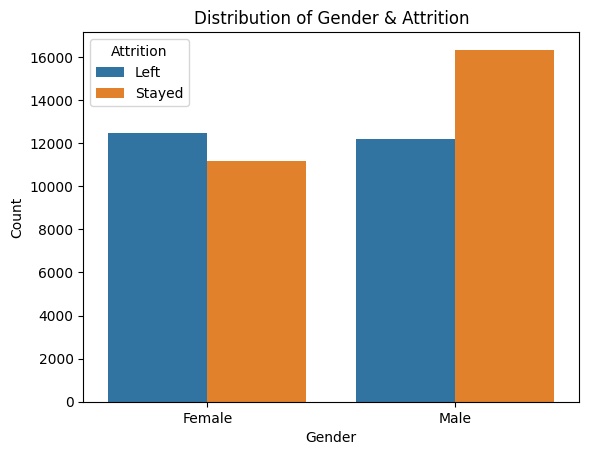

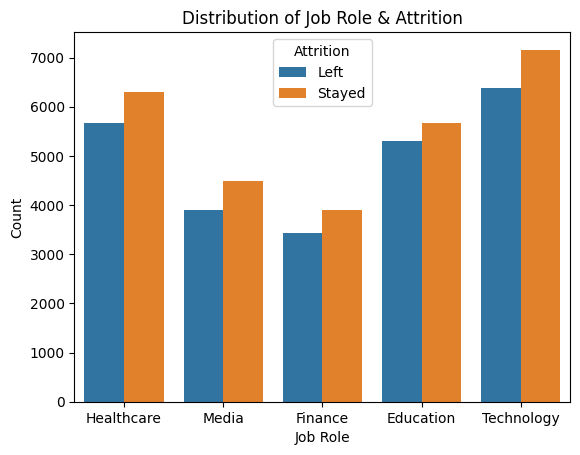

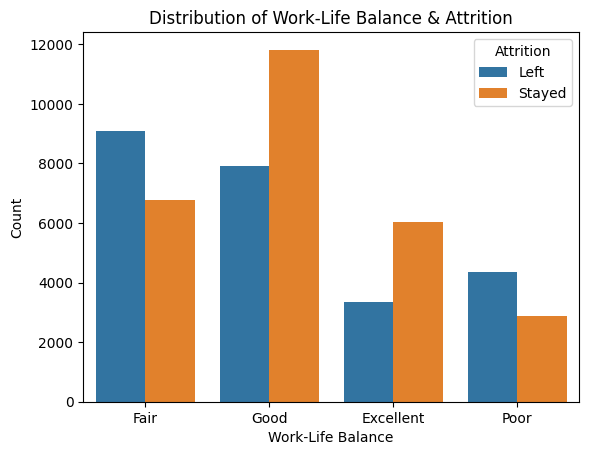

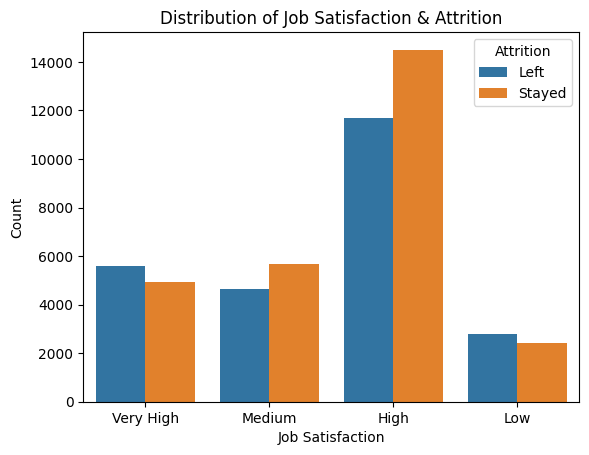

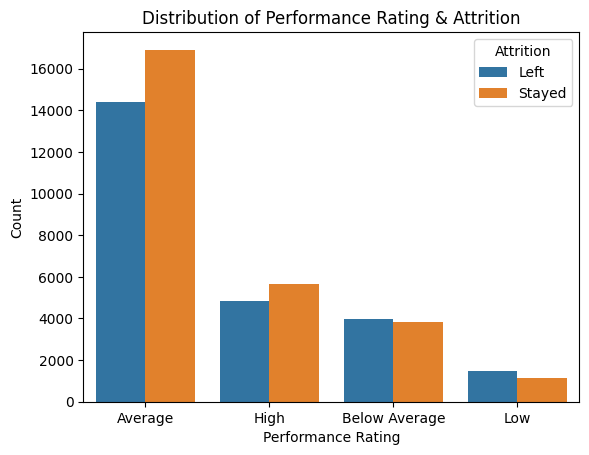

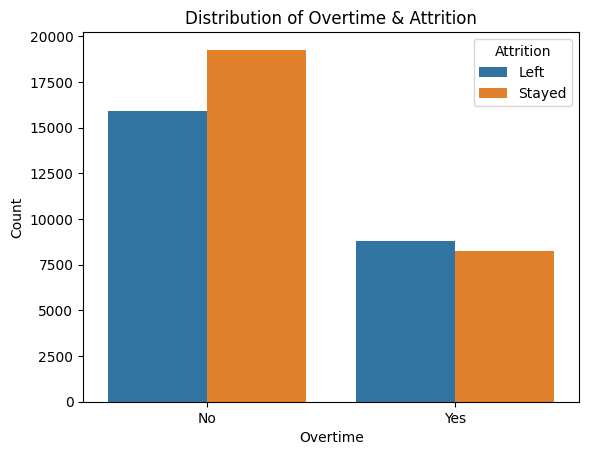

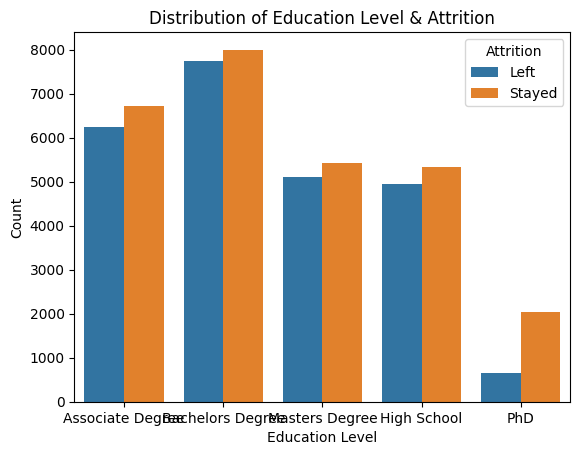

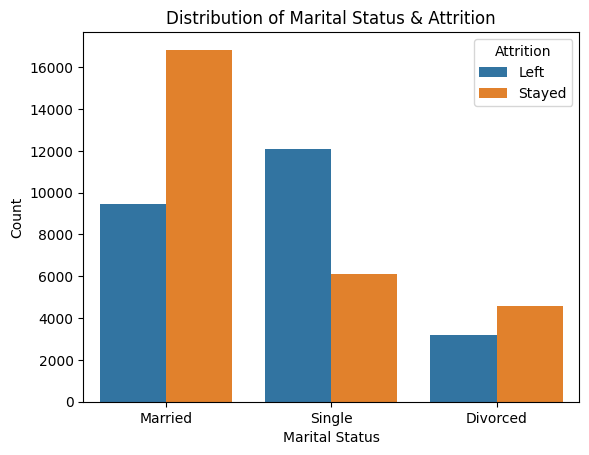

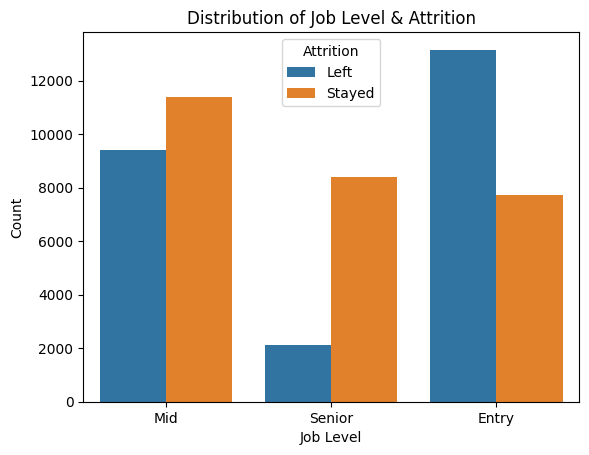

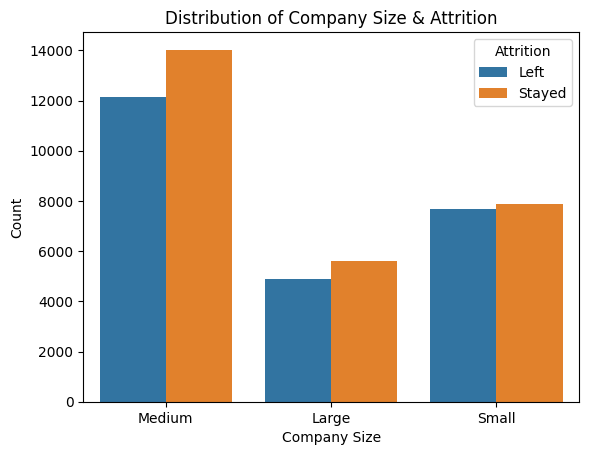

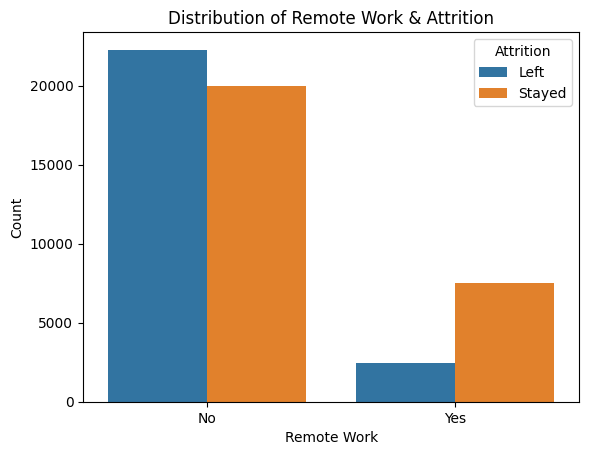

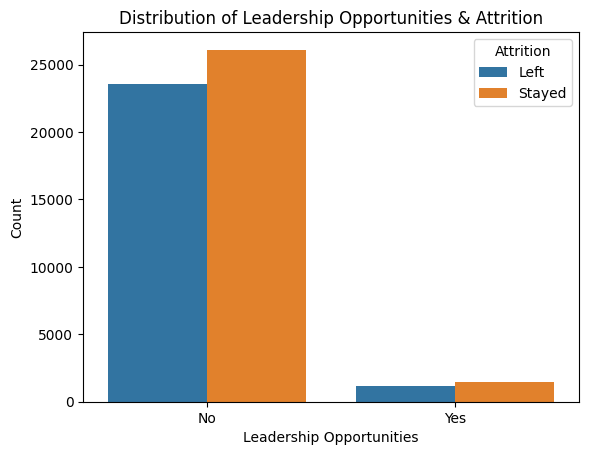

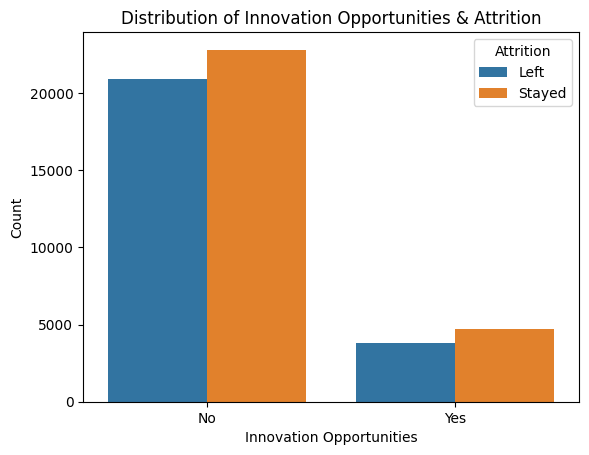

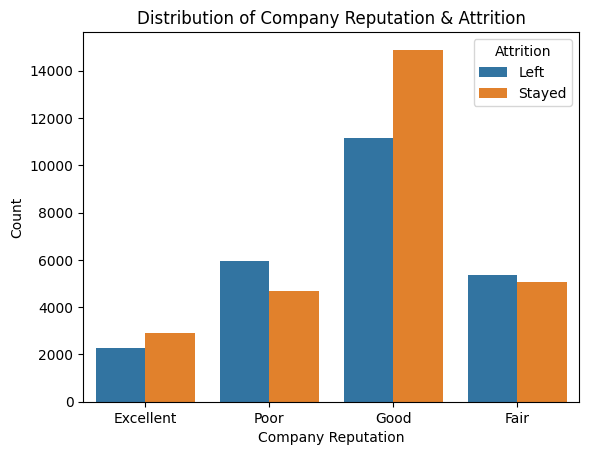

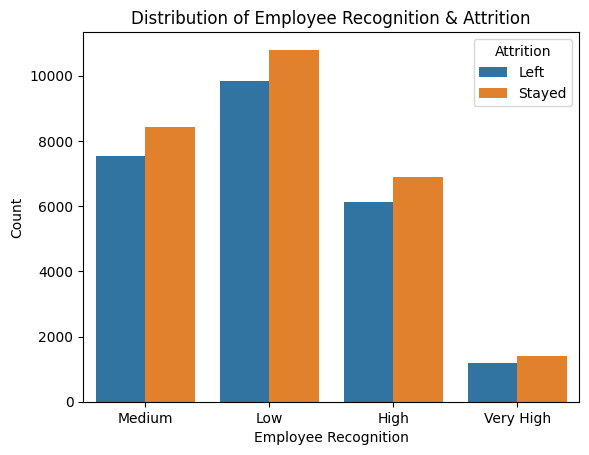

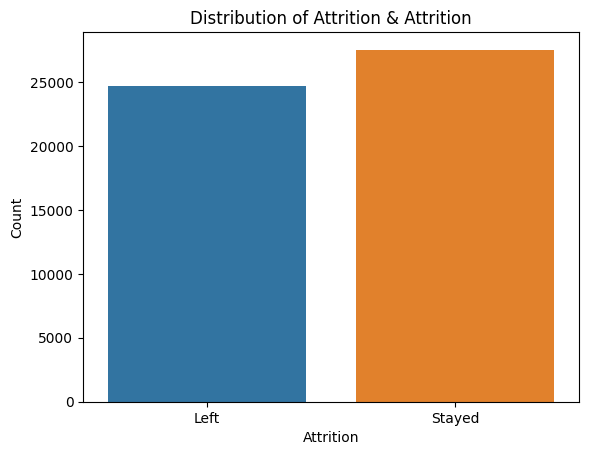

In [26]:
# Plot distribution for each categorical column with target variable
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    sns.countplot(data=df_train, x=col, hue='Attrition')
    plt.title(f'Distribution of {col} & Attrition')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [27]:
# key insights from above graphs-
# 1. employees with PhD education level, mostly stayed
# 2. Married emplopyees have high ratio for stayed, while single employees have high ratio for left
# 3. Senior employees have high ratio for stayed, while entry level employees have high ratio for left
# 4. Employees doing remote work , mostly stayed

## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [28]:
# Select numerical columns
numerical_columns_test = X_test.select_dtypes(include=['int64', 'float64']).columns
numerical_columns_test

Index(['Age', 'Monthly Income', 'Number of Promotions', 'Distance from Home',
       'Number of Dependents', 'Company Tenure (In Months)'],
      dtype='object')

5.1.2 Plot distribution of numerical columns

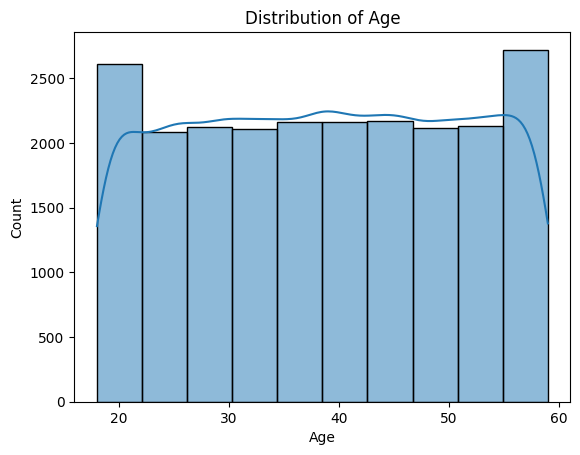

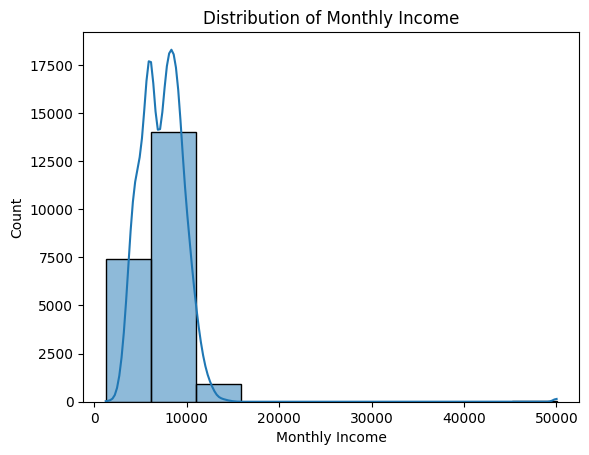

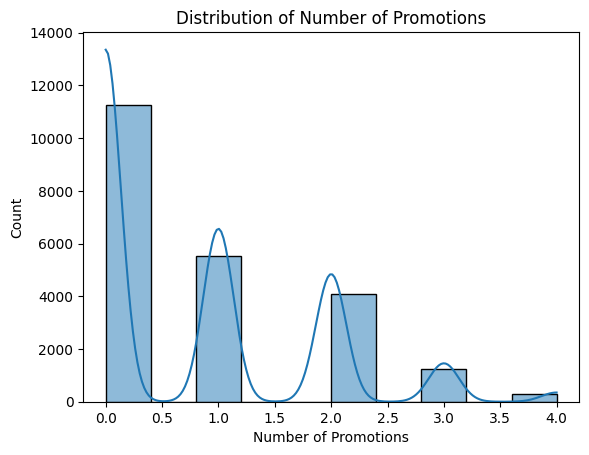

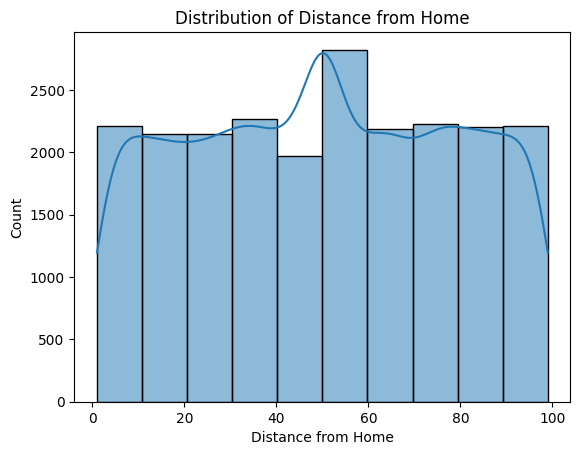

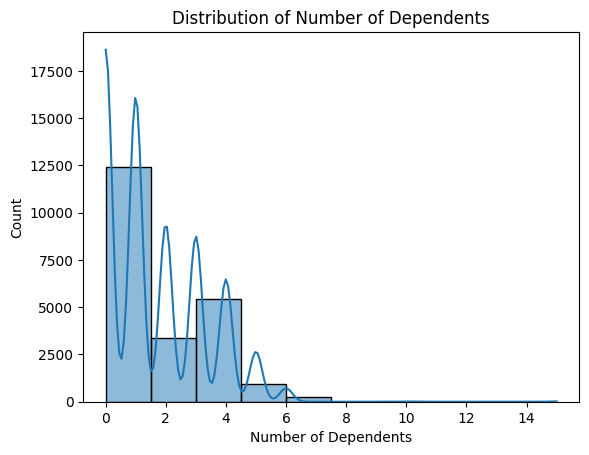

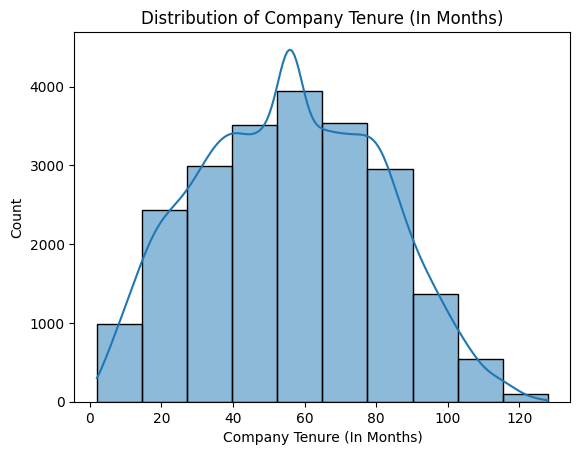

In [29]:
# Plot all the numerical columns to understand their distribution
for col in numerical_columns_test:
    sns.histplot(X_test[col], bins=10, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

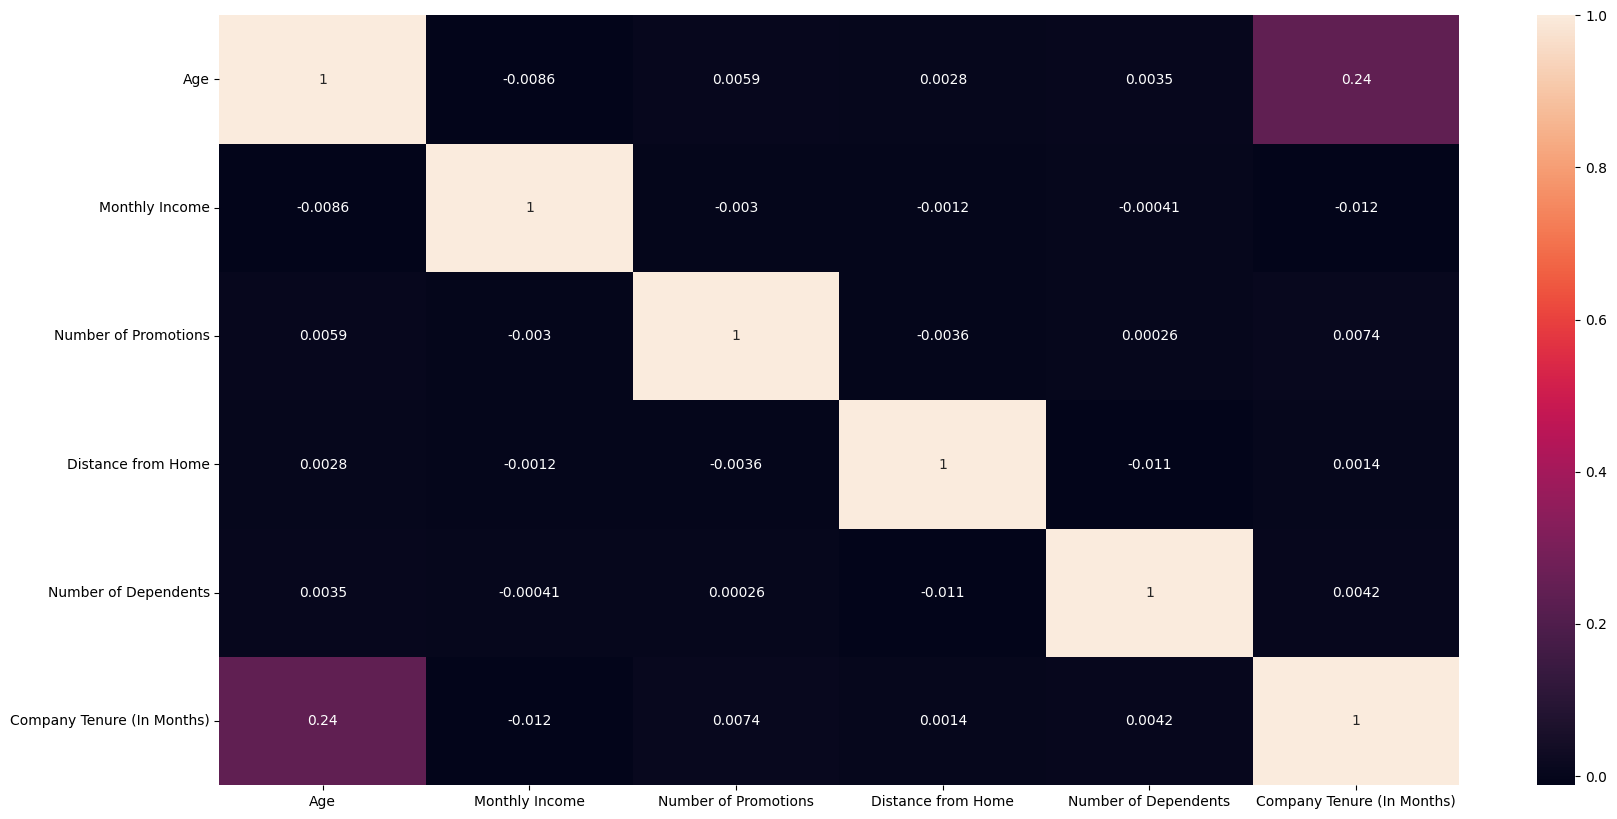

In [30]:
# Create correlation matrix for numerical columns
# X_test[numerical_columns_test].corr()
# Plot Heatmap of the correlation matrix
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_test[numerical_columns_test].corr(), annot = True)
plt.show()

# Age and Company Tenure in months columns have significant correlation although not considerable.

### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

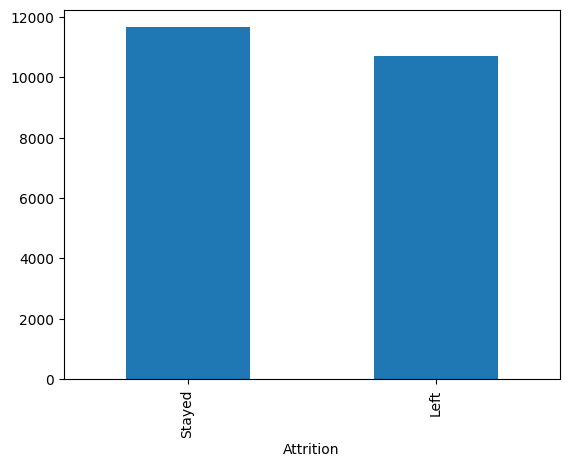

In [31]:
# Plot a bar chart to check class balance
y_test.value_counts().plot(kind='bar')
plt.show()

# we have balance y_test also with almost equal values for both categories.

### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

In [32]:
# Plot distribution for each categorical column with target variable
df_test = X_test
df_test['Attrition'] = y_test
df_test.head()

,Age,Gender,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
71975,36,Female,Media,6199,Poor,High,Below Average,1,No,50.0,...,0,Mid,Large,54.0,No,No,No,Poor,High,Left
20692,20,Male,Healthcare,7456,Excellent,High,Average,1,No,84.0,...,1,Senior,Small,16.0,No,No,Yes,Excellent,High,Stayed
21753,47,Female,Education,4744,Excellent,Medium,Average,0,Yes,84.0,...,2,Mid,Medium,40.0,No,No,Yes,Good,Low,Stayed
16382,49,Male,Healthcare,8807,Fair,High,Average,0,No,79.0,...,4,Mid,Medium,53.0,Yes,No,No,Excellent,Low,Stayed
58800,58,Female,Finance,7114,Poor,High,Average,1,Yes,54.0,...,3,Mid,Medium,78.0,Yes,No,No,Good,Medium,Stayed


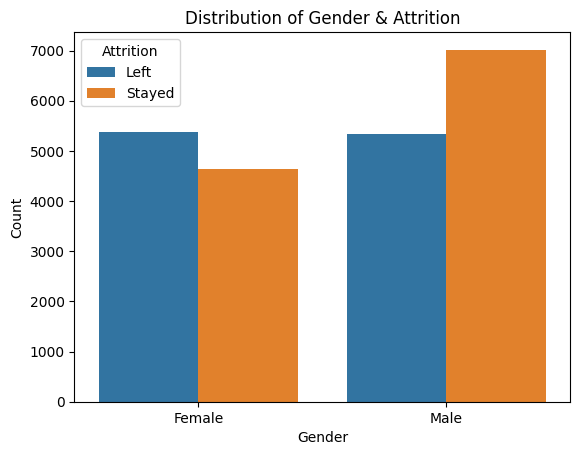

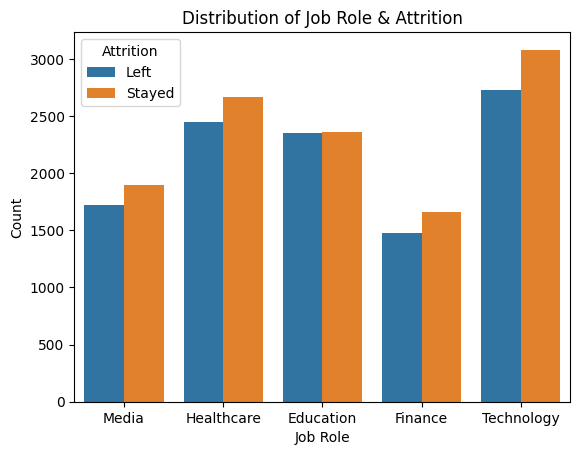

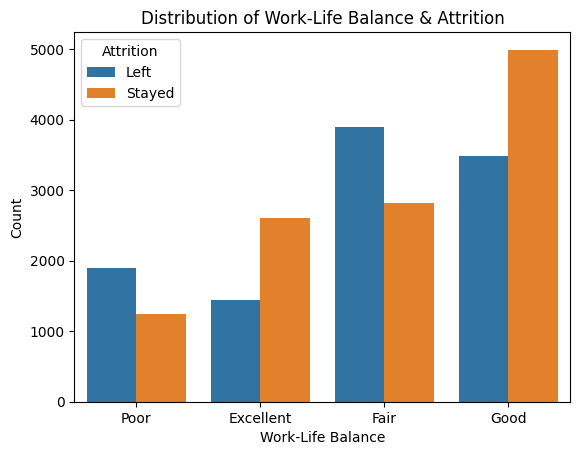

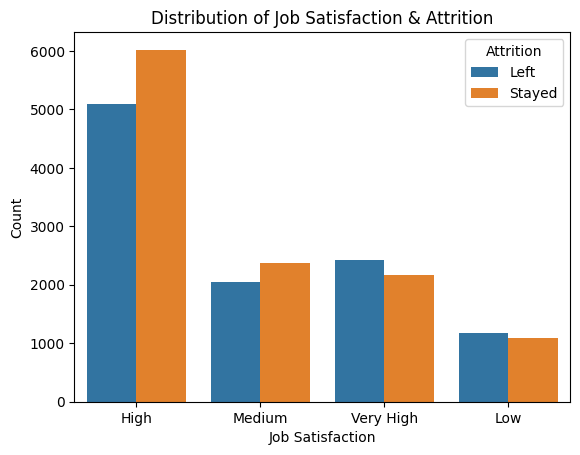

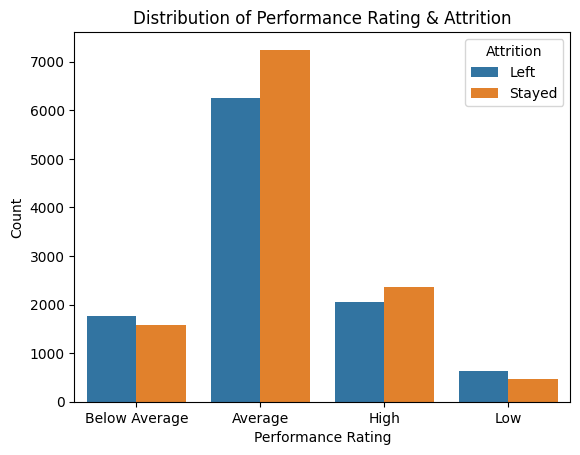

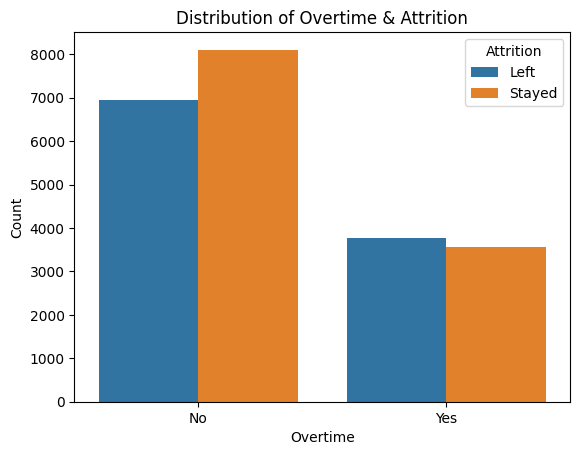

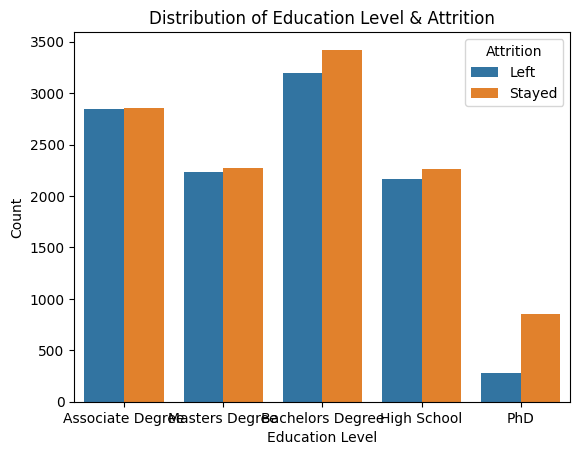

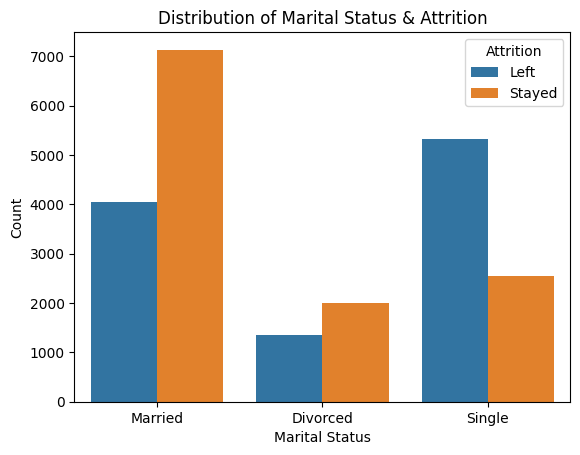

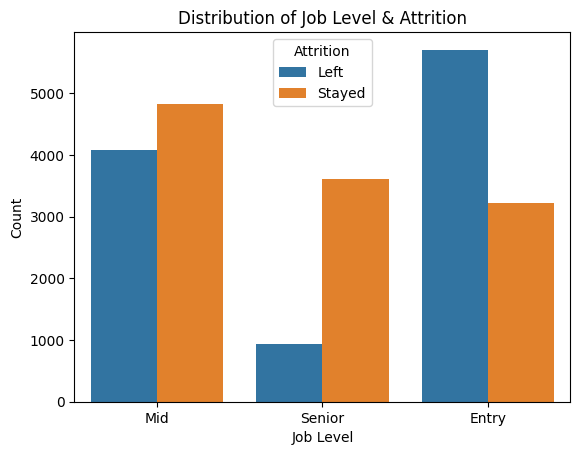

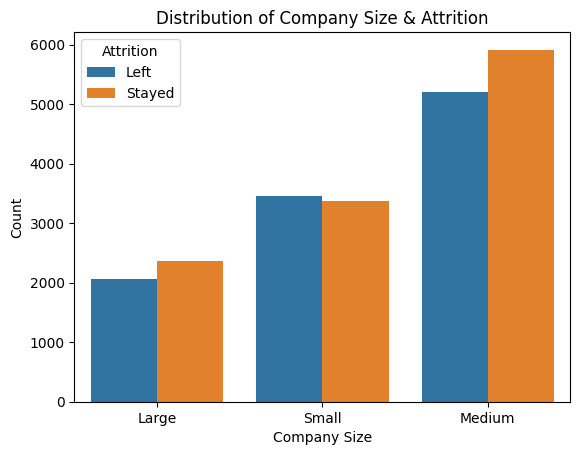

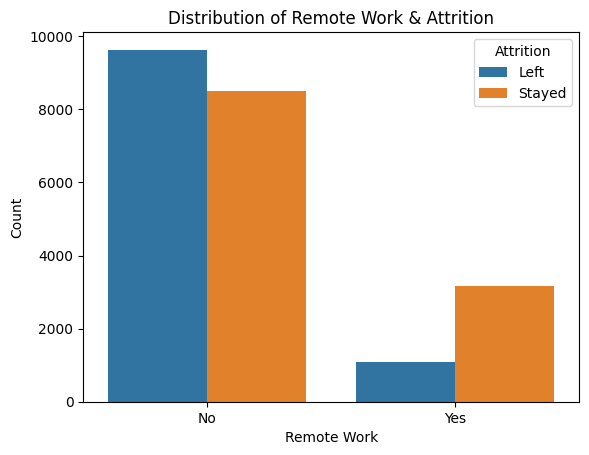

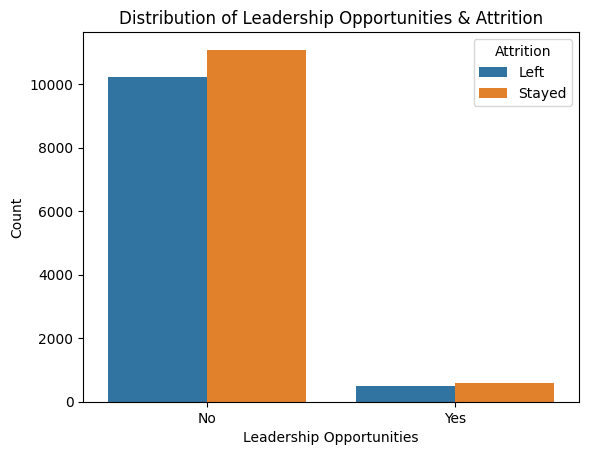

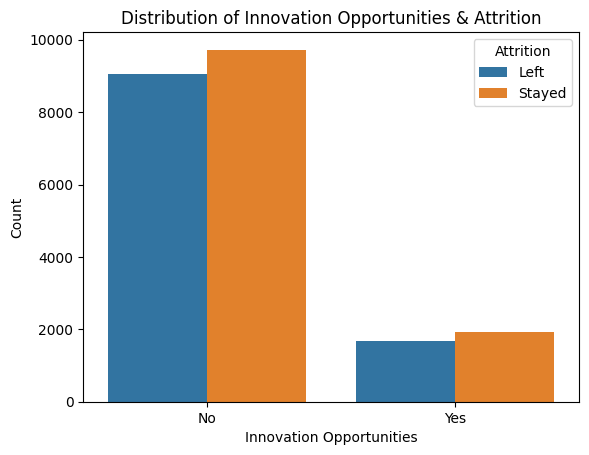

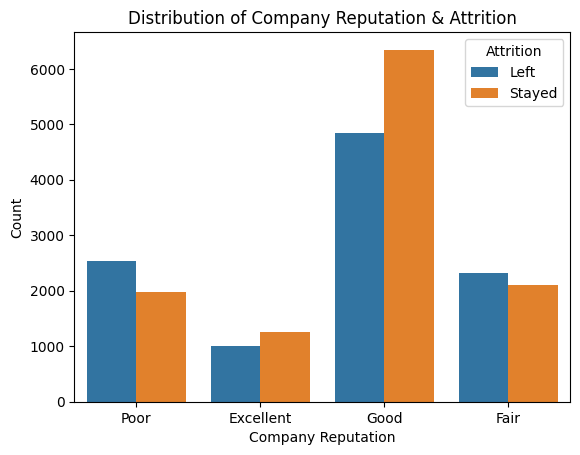

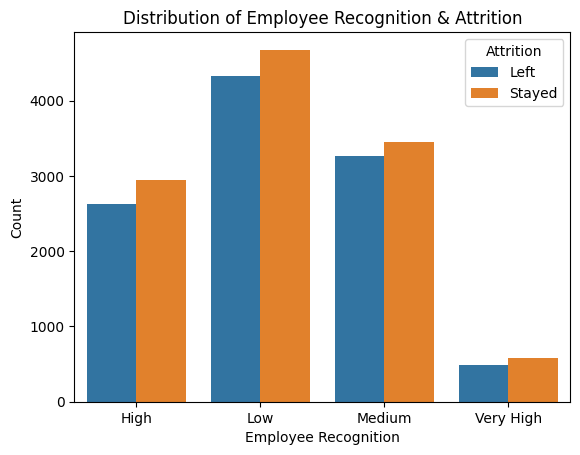

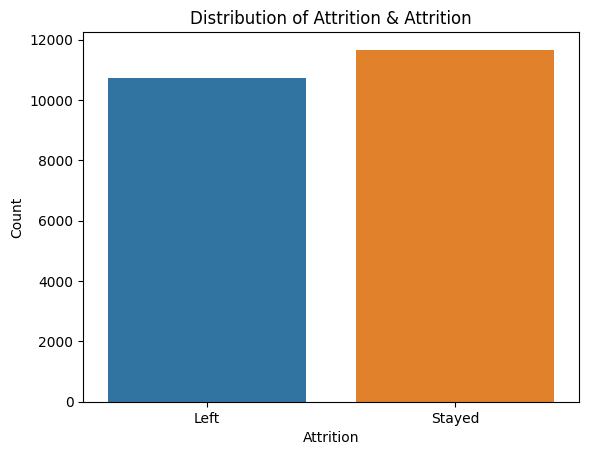

In [33]:
categorical_columns_test = X_test.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns_test:
    sns.countplot(data=df_test, x=col, hue='Attrition')
    plt.title(f'Distribution of {col} & Attrition')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [34]:
X_train = X_train.drop(['Attrition'], axis=1)

In [35]:
# Check the categorical columns
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition'],
      dtype='object')

6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [36]:
# Create dummy variables using the 'get_dummies' for independent columns
df1 = pd.get_dummies(X_train[categorical_columns], drop_first=True)
# Add the results to the master DataFrame
df = pd.concat([X_train, df1], axis=1)
df

,Age,Gender,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
67016,23,Female,Healthcare,7050,Fair,Very High,Average,0,No,95.0,...,False,False,False,False,False,False,False,False,True,False
9437,57,Female,Healthcare,8429,Good,Medium,Average,0,No,90.0,...,False,False,False,False,False,False,True,True,False,False
52439,34,Male,Media,7338,Fair,High,High,1,No,2.0,...,False,True,False,False,False,True,False,False,False,False
32387,49,Male,Finance,10099,Fair,High,Average,0,No,3.0,...,False,False,False,False,False,True,False,False,False,False
62365,59,Female,Healthcare,6843,Good,High,Average,0,No,25.0,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,32,Male,Healthcare,8809,Fair,Medium,Average,2,No,21.0,...,False,False,False,False,False,True,False,False,True,False
6265,45,Female,Technology,9907,Good,High,Average,0,No,3.0,...,True,True,False,False,False,False,True,False,True,False
54886,28,Male,Media,5238,Excellent,High,Low,0,No,22.0,...,False,False,False,False,False,True,False,False,False,False
860,39,Male,Finance,4814,Good,Medium,Average,2,No,52.0,...,False,False,True,False,False,True,False,True,False,False


Now, drop the original categorical columns and check the DataFrame

In [37]:
# Drop the original categorical columns and check the DataFrame
df = df.drop(categorical_columns, axis=1)
df

,Age,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months),Gender_Male,Job Role_Finance,Job Role_Healthcare,Job Role_Media,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
67016,23,7050,0,95.0,3,13.0,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
9437,57,8429,0,90.0,4,34.0,False,False,True,False,...,False,False,False,False,False,False,True,True,False,False
52439,34,7338,1,2.0,1,93.0,True,False,False,True,...,False,True,False,False,False,True,False,False,False,False
32387,49,10099,0,3.0,1,56.0,True,True,False,False,...,False,False,False,False,False,True,False,False,False,False
62365,59,6843,0,25.0,3,31.0,False,False,True,False,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,32,8809,2,21.0,4,26.0,True,False,True,False,...,False,False,False,False,False,True,False,False,True,False
6265,45,9907,0,3.0,1,79.0,False,False,False,False,...,True,True,False,False,False,False,True,False,True,False
54886,28,5238,0,22.0,1,5.0,True,False,False,True,...,False,False,False,False,False,True,False,False,False,False
860,39,4814,2,52.0,2,74.0,True,True,False,False,...,False,False,True,False,False,True,False,True,False,False


In [38]:
# Converting True to 1 AND false to 0, for binary value categorical columns, needed for model building
df = df.replace({True: 1, False: 0})
df

,Age,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months),Gender_Male,Job Role_Finance,Job Role_Healthcare,Job Role_Media,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
67016,23,7050,0,95.0,3,13.0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
9437,57,8429,0,90.0,4,34.0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
52439,34,7338,1,2.0,1,93.0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
32387,49,10099,0,3.0,1,56.0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
62365,59,6843,0,25.0,3,31.0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,32,8809,2,21.0,4,26.0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
6265,45,9907,0,3.0,1,79.0,0,0,0,0,...,1,1,0,0,0,0,1,0,1,0
54886,28,5238,0,22.0,1,5.0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
860,39,4814,2,52.0,2,74.0,1,1,0,0,...,0,0,1,0,0,1,0,1,0,0


6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [39]:
X_test = X_test.drop(['Attrition'], axis=1)
categorical_columns_test = X_test.select_dtypes(include=['object', 'category']).columns
categorical_columns_test
# Create dummy variables using the 'get_dummies' for independent columns
df2 = pd.get_dummies(X_test[categorical_columns_test], drop_first=True)
# Add the results to the master DataFrame
df_test = pd.concat([X_test, df2], axis=1)
df_test

,Age,Gender,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
71975,36,Female,Media,6199,Poor,High,Below Average,1,No,50.0,...,False,False,False,False,False,False,True,False,False,False
20692,20,Male,Healthcare,7456,Excellent,High,Average,1,No,84.0,...,True,False,False,True,False,False,False,False,False,False
21753,47,Female,Education,4744,Excellent,Medium,Average,0,Yes,84.0,...,False,False,False,True,False,True,False,True,False,False
16382,49,Male,Healthcare,8807,Fair,High,Average,0,No,79.0,...,False,True,False,False,False,False,False,True,False,False
58800,58,Female,Finance,7114,Poor,High,Average,1,Yes,54.0,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72737,30,Female,Healthcare,7938,Excellent,Very High,Average,1,No,51.0,...,False,False,False,False,False,True,False,False,False,False
13004,29,Female,Healthcare,8153,Fair,High,Low,0,No,96.0,...,False,True,False,True,False,True,False,False,True,False
21670,54,Male,Healthcare,7108,Excellent,High,Below Average,2,No,40.0,...,False,False,False,False,True,False,False,False,False,False
64600,44,Male,Education,3906,Good,Low,Average,2,No,32.0,...,False,False,False,False,False,False,True,True,False,False


Now, drop the original categorical columns and check the DataFrame

In [40]:
# Drop categorical columns and check the DataFrame
df_test = df_test.drop(categorical_columns_test, axis=1)
df_test

,Age,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months),Gender_Male,Job Role_Finance,Job Role_Healthcare,Job Role_Media,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
71975,36,6199,1,50.0,0,54.0,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
20692,20,7456,1,84.0,1,16.0,True,False,True,False,...,True,False,False,True,False,False,False,False,False,False
21753,47,4744,0,84.0,2,40.0,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
16382,49,8807,0,79.0,4,53.0,True,False,True,False,...,False,True,False,False,False,False,False,True,False,False
58800,58,7114,1,54.0,3,78.0,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72737,30,7938,1,51.0,3,73.0,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
13004,29,8153,0,96.0,0,56.0,False,False,True,False,...,False,True,False,True,False,True,False,False,True,False
21670,54,7108,2,40.0,0,87.0,True,False,True,False,...,False,False,False,False,True,False,False,False,False,False
64600,44,3906,2,32.0,0,60.0,True,False,False,False,...,False,False,False,False,False,False,True,True,False,False


In [41]:
# Converting True to 1 AND false to 0, for binary value categorical columns, needed for model testing
df_test = df_test.replace({True: 1, False: 0})
df_test

,Age,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months),Gender_Male,Job Role_Finance,Job Role_Healthcare,Job Role_Media,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
71975,36,6199,1,50.0,0,54.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
20692,20,7456,1,84.0,1,16.0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
21753,47,4744,0,84.0,2,40.0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
16382,49,8807,0,79.0,4,53.0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
58800,58,7114,1,54.0,3,78.0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72737,30,7938,1,51.0,3,73.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
13004,29,8153,0,96.0,0,56.0,0,0,1,0,...,0,1,0,1,0,1,0,0,1,0
21670,54,7108,2,40.0,0,87.0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
64600,44,3906,2,32.0,0,60.0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [42]:
# Convert y_train and y_validation to DataFrame to create dummy variables
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [43]:
# Create dummy variables using the 'get_dummies' for dependent column
y_train = pd.get_dummies(y_train['Attrition'], drop_first=True)
y_train

,Stayed
67016,False
9437,True
52439,True
32387,False
62365,True
...,...
37194,True
6265,False
54886,False
860,False


In [44]:
y_train = y_train.replace({True: 1, False: 0})
y_train

,Stayed
67016,0
9437,1
52439,1
32387,0
62365,1
...,...
37194,1
6265,0
54886,0
860,0


6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [45]:
# Create dummy variables using the 'get_dummies' for dependent column
y_test = pd.get_dummies(y_test['Attrition'], drop_first=True)
y_test

,Stayed
71975,False
20692,True
21753,True
16382,True
58800,True
...,...
72737,True
13004,True
21670,False
64600,True


In [46]:
y_test = y_test.replace({True: 1, False: 0})
y_test

,Stayed
71975,0
20692,1
21753,1
16382,1
58800,1
...,...
72737,1
13004,1
21670,0
64600,1


6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [47]:
# Drop redundant columns from both train and validation

# As you can see above 'Attrition' column already got removed from both, also 'drop_first=True' makes sure that redundant column 'Left' gets removed from both

### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [48]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [49]:
# Scale the numeric features present in the training set
X_train_scaled = scaler.fit_transform(df)

# Scale the numerical features present in the validation set
X_test_scaled = scaler.transform(df_test)

In [50]:
X_train_scaled =  pd.DataFrame(X_train_scaled, columns=df.columns, index= df.index)
X_train_scaled

,Age,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months),Gender_Male,Job Role_Finance,Job Role_Healthcare,Job Role_Media,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
67016,0.121951,0.118847,0.00,0.959184,0.200000,0.088,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9437,0.951220,0.147119,0.00,0.908163,0.266667,0.256,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
52439,0.390244,0.124751,0.25,0.010204,0.066667,0.728,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32387,0.756098,0.181356,0.00,0.020408,0.066667,0.432,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
62365,1.000000,0.114603,0.00,0.244898,0.200000,0.232,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,0.341463,0.154909,0.50,0.204082,0.266667,0.192,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6265,0.658537,0.177420,0.00,0.020408,0.066667,0.616,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
54886,0.243902,0.081698,0.00,0.214286,0.066667,0.024,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
860,0.512195,0.073006,0.50,0.520408,0.133333,0.576,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [51]:
X_test_scaled =  pd.DataFrame(X_test_scaled, columns=df_test.columns, index= df_test.index)
X_test_scaled

,Age,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months),Gender_Male,Job Role_Finance,Job Role_Healthcare,Job Role_Media,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
71975,0.439024,0.101400,0.25,0.500000,0.000000,0.416,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
20692,0.048780,0.127171,0.25,0.846939,0.066667,0.112,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
21753,0.707317,0.071571,0.00,0.846939,0.133333,0.304,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
16382,0.756098,0.154868,0.00,0.795918,0.266667,0.408,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
58800,0.975610,0.120159,0.25,0.540816,0.200000,0.608,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72737,0.292683,0.137052,0.25,0.510204,0.200000,0.568,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13004,0.268293,0.141460,0.00,0.969388,0.000000,0.432,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
21670,0.878049,0.120036,0.50,0.397959,0.000000,0.680,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
64600,0.634146,0.054390,0.50,0.316327,0.000000,0.464,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [52]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [53]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(log, n_features_to_select=15).fit(X_train_scaled, y_train)

In [54]:
# Display the features selected by RFE
X_train_scaled.columns[rfe.support_]

Index(['Age', 'Number of Promotions', 'Distance from Home',
       'Number of Dependents', 'Gender_Male', 'Work-Life Balance_Fair',
       'Work-Life Balance_Poor', 'Job Satisfaction_Very High',
       'Performance Rating_Low', 'Education Level_PhD',
       'Marital Status_Single', 'Job Level_Mid', 'Job Level_Senior',
       'Remote Work_Yes', 'Company Reputation_Poor'],
      dtype='object')

7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [55]:
# Put columns selected by RFE into variable 'col'
col = X_train_scaled.columns[rfe.support_]
col

Index(['Age', 'Number of Promotions', 'Distance from Home',
       'Number of Dependents', 'Gender_Male', 'Work-Life Balance_Fair',
       'Work-Life Balance_Poor', 'Job Satisfaction_Very High',
       'Performance Rating_Low', 'Education Level_PhD',
       'Marital Status_Single', 'Job Level_Mid', 'Job Level_Senior',
       'Remote Work_Yes', 'Company Reputation_Poor'],
      dtype='object')

### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [56]:
# Select only the columns selected by RFE
X_train_scaled = X_train_scaled[col]


In [57]:
# View the training data
X_train_scaled

,Age,Number of Promotions,Distance from Home,Number of Dependents,Gender_Male,Work-Life Balance_Fair,Work-Life Balance_Poor,Job Satisfaction_Very High,Performance Rating_Low,Education Level_PhD,Marital Status_Single,Job Level_Mid,Job Level_Senior,Remote Work_Yes,Company Reputation_Poor
67016,0.121951,0.00,0.959184,0.200000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9437,0.951220,0.00,0.908163,0.266667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
52439,0.390244,0.25,0.010204,0.066667,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
32387,0.756098,0.00,0.020408,0.066667,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
62365,1.000000,0.00,0.244898,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,0.341463,0.50,0.204082,0.266667,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6265,0.658537,0.00,0.020408,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
54886,0.243902,0.00,0.214286,0.066667,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
860,0.512195,0.50,0.520408,0.133333,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [58]:
# Import statsmodels and add constant to training set
import statsmodels.api as sm
X_train_scaled = sm.add_constant(X_train_scaled)
X_train_scaled

,const,Age,Number of Promotions,Distance from Home,Number of Dependents,Gender_Male,Work-Life Balance_Fair,Work-Life Balance_Poor,Job Satisfaction_Very High,Performance Rating_Low,Education Level_PhD,Marital Status_Single,Job Level_Mid,Job Level_Senior,Remote Work_Yes,Company Reputation_Poor
67016,1.0,0.121951,0.00,0.959184,0.200000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9437,1.0,0.951220,0.00,0.908163,0.266667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
52439,1.0,0.390244,0.25,0.010204,0.066667,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
32387,1.0,0.756098,0.00,0.020408,0.066667,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
62365,1.0,1.000000,0.00,0.244898,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,1.0,0.341463,0.50,0.204082,0.266667,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6265,1.0,0.658537,0.00,0.020408,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
54886,1.0,0.243902,0.00,0.214286,0.066667,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
860,1.0,0.512195,0.50,0.520408,0.133333,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [59]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
model = sm.Logit(y_train, X_train_scaled).fit()

Optimization terminated successfully.
         Current function value: 0.496717
         Iterations 6


In [60]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Stayed   No. Observations:                52227
Model:                          Logit   Df Residuals:                    52211
Method:                           MLE   Df Model:                           15
Date:                Tue, 22 Apr 2025   Pseudo R-squ.:                  0.2819
Time:                        10:30:11   Log-Likelihood:                -25942.
converged:                       True   LL-Null:                       -36124.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.2910      0.039     -7.436      0.000      -0.368      -0.214
Age                            0.5182      0.037     14.129      0.000       0.446       0.590
Number of Promotions           0.9747      0.044     22.184      0.000       0.889       1.061
Distance from Home            -0.9558      0.038    -25.174      0.000      -1.030      -0.881
Number of Dependents           2.1124      0.104     20.254      0.000       1.908       2.317
Gender_Male                    0.5851      0.022     26.791      0.000       0.542       0.628
Work-Life Balance_Fair        -1.1017      0.025    -44.417      0.000      -1.150      -1.053
Work-Life Balance_Poor        -1.3245      0.033    -39.936      0.000      -1.390      -1.260
Job Satisfaction_Very High    -0.4576      0.027    -17.016      0.000      -0.510      -0.405
Performance Rating_Low        -0.5515      0.050    -11.048      0.000      -0.649      -0.454
Education Level_PhD            1.5663      0.054     28.782      0.000       1.460       1.673
Marital Status_Single         -1.7248      0.024    -70.794      0.000      -1.773      -1.677
Job Level_Mid                  0.9728      0.024     40.849      0.000       0.926       1.020
Job Level_Senior               2.5528      0.034     74.557      0.000       2.486       2.620
Remote Work_Yes                1.7692      0.031     57.397      0.000       1.709       1.830
Company Reputation_Poor       -0.6572      0.027    -24.261      0.000      -0.710      -0.604
==============================================================================================
"""

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [61]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
X_train_vif = X_train_scaled.drop('const', axis=1)
X_train_vif

,Age,Number of Promotions,Distance from Home,Number of Dependents,Gender_Male,Work-Life Balance_Fair,Work-Life Balance_Poor,Job Satisfaction_Very High,Performance Rating_Low,Education Level_PhD,Marital Status_Single,Job Level_Mid,Job Level_Senior,Remote Work_Yes,Company Reputation_Poor
67016,0.121951,0.00,0.959184,0.200000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9437,0.951220,0.00,0.908163,0.266667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
52439,0.390244,0.25,0.010204,0.066667,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
32387,0.756098,0.00,0.020408,0.066667,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
62365,1.000000,0.00,0.244898,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,0.341463,0.50,0.204082,0.266667,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6265,0.658537,0.00,0.020408,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
54886,0.243902,0.00,0.214286,0.066667,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
860,0.512195,0.50,0.520408,0.133333,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [63]:
# Make a VIF DataFrame for all the variables present
vif=pd.DataFrame()

vif['Features']=X_train_vif.columns
vif['VIF']=[variance_inflation_factor(X_train_vif.values,i) for i in range(X_train_vif.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,Distance from Home,3.10
0,Age,3.05
4,Gender_Male,2.01
3,Number of Dependents,1.93
11,Job Level_Mid,1.82
1,Number of Promotions,1.62
10,Marital Status_Single,1.48
5,Work-Life Balance_Fair,1.47
12,Job Level_Senior,1.41
14,Company Reputation_Poor,1.23


Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [64]:
# Predict the probabilities on the training set
probab = model.predict(X_train_scaled)
probab

,0
67016,0.212715
9437,0.553015
52439,0.914240
32387,0.117195
62365,0.959208
...,...
37194,0.371205
6265,0.391447
54886,0.685198
860,0.519767


7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [65]:
# Reshape it into an array
array_output = probab.values.reshape(-1,1)
array_output

array([[0.21271505],
       [0.5530153 ],
       [0.91423966],
       ...,
       [0.68519817],
       [0.51976656],
       [0.08441994]])

7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [66]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
train_compare = pd.DataFrame({'Actual': y_train['Stayed'], 'Predicted_prob': array_output.reshape(1, -1)[0]})
train_compare

,Actual,Predicted_prob
67016,0,0.212715
9437,1,0.553015
52439,1,0.914240
32387,0,0.117195
62365,1,0.959208
...,...,...
37194,1,0.371205
6265,0,0.391447
54886,0,0.685198
860,0,0.519767


7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [67]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
train_compare['Predicted'] = (train_compare['Predicted_prob'] > 0.5).astype(int)

In [68]:
train_compare

,Actual,Predicted_prob,Predicted
67016,0,0.212715,0
9437,1,0.553015,1
52439,1,0.914240,1
32387,0,0.117195,0
62365,1,0.959208,1
...,...,...,...
37194,1,0.371205,0
6265,0,0.391447,0
54886,0,0.685198,1
860,0,0.519767,1


**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [69]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Check the overall accuracy
accuracy = metrics.accuracy_score(train_compare['Actual'], train_compare['Predicted'])
accuracy

0.7451892699178586

7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [70]:
# Create confusion matrix
matrix = metrics.confusion_matrix(train_compare['Actual'], train_compare['Predicted'])
matrix

array([[17973,  6726],
       [ 6582, 20946]])

7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [71]:
# Create variables for true positive, true negative, false positive and false negative

true_positive = matrix[0,0]
true_negative = matrix[1,1]
false_positive = matrix[0,1]
false_negative = matrix[1,0]

# true_positive = TP, true_negative=TN, false_positive = FP, false_negative = FN

7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [72]:
# Calculate sensitivity
sensitivity = (true_positive)/(true_positive + false_negative)
sensitivity

np.float64(0.7319486866218693)

In [73]:
# Calculate specificity
specificity = (true_negative)/(true_negative + false_positive)
specificity

np.float64(0.7569384215091067)

7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [74]:
# Calculate precision
precision = (true_positive)/(true_positive + false_positive)
precision

np.float64(0.727681282643022)

In [75]:
# Calculate recall
recall = sensitivity
recall

np.float64(0.7319486866218693)

### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [76]:
# Define ROC function
from sklearn.metrics import roc_curve, roc_auc_score
def plot_roc_curve(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

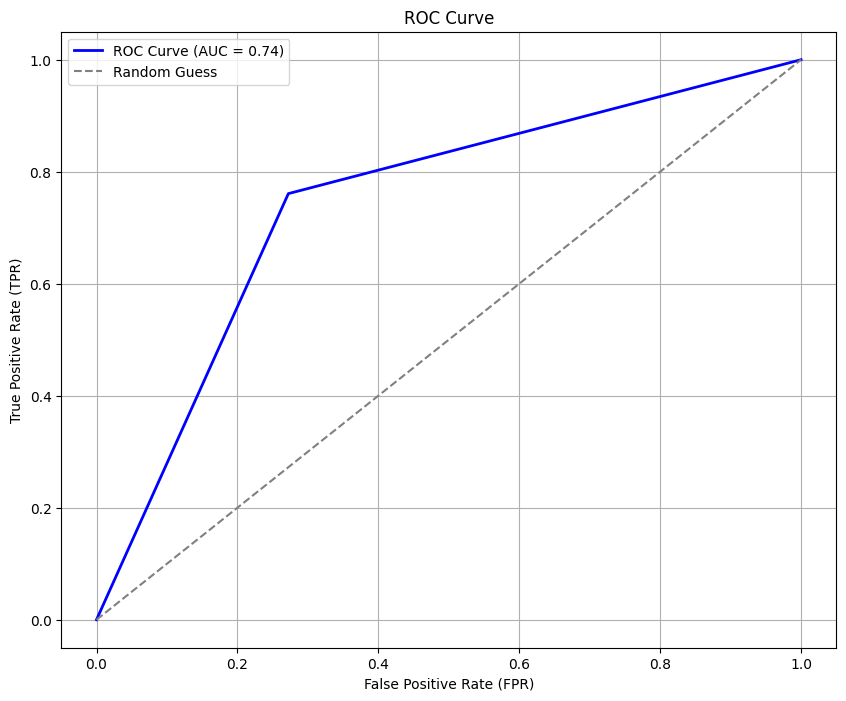

In [77]:
# Call the ROC function
plot_roc_curve(train_compare['Actual'], train_compare['Predicted'])

**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [104]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
train_compare_diff = pd.DataFrame({'Actual': y_train['Stayed'], 'Predicted_prob': array_output.reshape(1, -1)[0]})
train_compare_diff['Predicted_0.2'] = (train_compare_diff['Predicted_prob'] > 0.2).astype(int)
train_compare_diff['Predicted_0.3'] = (train_compare_diff['Predicted_prob'] > 0.3).astype(int)
train_compare_diff['Predicted_0.4'] = (train_compare_diff['Predicted_prob'] > 0.4).astype(int)
train_compare_diff['Predicted_0.6'] = (train_compare_diff['Predicted_prob'] > 0.6).astype(int)
train_compare_diff['Predicted_0.7'] = (train_compare_diff['Predicted_prob'] > 0.7).astype(int)
train_compare_diff['Predicted_0.8'] = (train_compare_diff['Predicted_prob'] > 0.8).astype(int)
train_compare_diff

,Actual,Predicted_prob,Predicted_0.2,Predicted_0.3,Predicted_0.4,Predicted_0.6,Predicted_0.7,Predicted_0.8
67016,0,0.212715,1,0,0,0,0,0
9437,1,0.553015,1,1,1,0,0,0
52439,1,0.914240,1,1,1,1,1,1
32387,0,0.117195,0,0,0,0,0,0
62365,1,0.959208,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
37194,1,0.371205,1,1,0,0,0,0
6265,0,0.391447,1,1,0,0,0,0
54886,0,0.685198,1,1,1,1,0,0
860,0,0.519767,1,1,1,0,0,0


7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [105]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
cutoffs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
tradeoff_df = pd.DataFrame(columns=['Cutoff', 'Accuracy', 'Sensitivity', 'Specificity'])
for cutoff in cutoffs:
    prediction = (train_compare_diff['Predicted_prob'] > cutoff).astype(int)
    tn, fp, fn, tp = confusion_matrix(train_compare_diff['Actual'], prediction).ravel()
    tradeoff_df = pd.concat([tradeoff_df, pd.DataFrame({
        'Cutoff': [cutoff],
        'Accuracy': [accuracy_score(train_compare_diff['Actual'], prediction)],
        'Sensitivity': [recall_score(train_compare_diff['Actual'], prediction)],  # Sensitivity same as recall
        'Specificity': [tn / (tn + fp)]
    })], ignore_index=True)
tradeoff_df

,Cutoff,Accuracy,Sensitivity,Specificity
0,0.1,0.599383,0.994878,0.158589
1,0.2,0.669941,0.963274,0.343010
2,0.3,0.713807,0.910237,0.494878
3,0.4,0.737320,0.843178,0.619337
4,0.5,0.745189,0.760898,0.727681
5,0.6,0.738928,0.668301,0.817644
6,0.7,0.715396,0.556742,0.892222
7,0.8,0.669596,0.414233,0.954209
8,0.9,0.592127,0.234125,0.991133


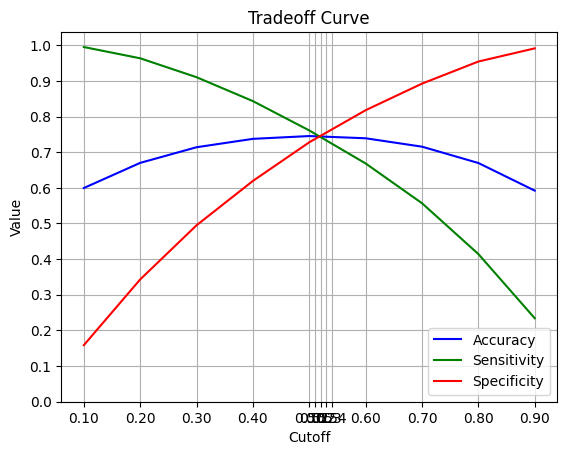

In [108]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs

plt.plot(tradeoff_df['Cutoff'], tradeoff_df['Accuracy'],
         label='Accuracy', color='blue')
plt.plot(tradeoff_df['Cutoff'], tradeoff_df['Sensitivity'],
         label='Sensitivity', color='green')
plt.plot(tradeoff_df['Cutoff'], tradeoff_df['Specificity'],
         label='Specificity', color='red')
plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.51, 0.52, 0.53, 0.54, 0.6, 0.7, 0.8, 0.9])
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.xlabel('Cutoff')
plt.ylabel('Value')
plt.title('Tradeoff Curve')
plt.legend()
plt.grid(True)
plt.show()

In [109]:
# At around 0.515 cutoff, 3 curves intersects, which is our optimal cutoff point.

7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [110]:
# Create a column for final prediction based on the optimal cutoff
train_final = pd.DataFrame({'Actual': y_train['Stayed'], 'Predicted_prob': array_output.reshape(1, -1)[0]})
train_final['Predicted'] = (train_final['Predicted_prob'] > 0.515).astype(int)
train_final

,Actual,Predicted_prob,Predicted
67016,0,0.212715,0
9437,1,0.553015,1
52439,1,0.914240,1
32387,0,0.117195,0
62365,1,0.959208,1
...,...,...,...
37194,1,0.371205,0
6265,0,0.391447,0
54886,0,0.685198,1
860,0,0.519767,1


7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [111]:
# Calculate the accuracy
accuracy = metrics.accuracy_score(train_final['Actual'], train_final['Predicted'])
accuracy

0.7451509755490455

7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [112]:
# Create the confusion matrix once again
matrix = metrics.confusion_matrix(train_final['Actual'], train_final['Predicted'])
matrix

array([[18338,  6361],
       [ 6949, 20579]])

7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [113]:
# Create variables for true positive, true negative, false positive and false negative
true_positive = matrix[0,0]
true_negative = matrix[1,1]
false_positive = matrix[0,1]
false_negative = matrix[1,0]

# true_positive = TP, true_negative=TN, false_positive = FP, false_negative = FN

7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [114]:
# Calculate Sensitivity
sensitivity = (true_positive)/(true_positive + false_negative)
sensitivity

np.float64(0.7251947641080397)

In [115]:
# Calculate Specificity
specificity = (true_negative)/(true_negative + false_positive)
specificity

np.float64(0.7638827023014105)

7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [116]:
# Calculate Precision
precision = (true_positive)/(true_positive + false_positive)
precision

np.float64(0.7424592088748533)

In [117]:
# Calculate Recall
recall = sensitivity
recall

np.float64(0.7251947641080397)

**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [118]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [119]:
# Check actual and predicted values from initial model
train_final

,Actual,Predicted_prob,Predicted
67016,0,0.212715,0
9437,1,0.553015,1
52439,1,0.914240,1
32387,0,0.117195,0
62365,1,0.959208,1
...,...,...,...
37194,1,0.371205,0
6265,0,0.391447,0
54886,0,0.685198,1
860,0,0.519767,1


7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

In [120]:
# Plot precision-recall curve
precision, recall, thresholds = precision_recall_curve(
    train_final['Actual'],
    train_final['Predicted_prob']
)

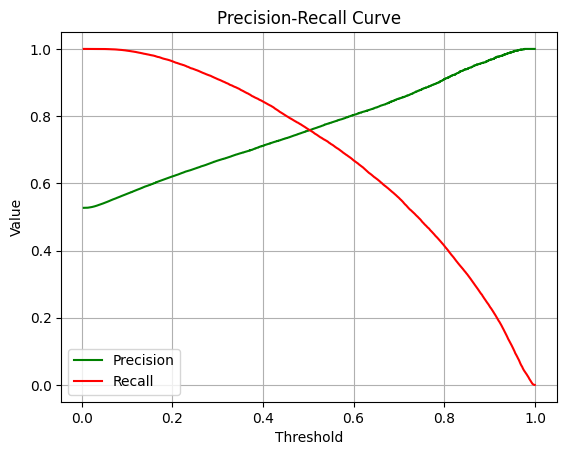

In [121]:
plt.plot(thresholds, precision[:-1], "g-", label='Precision')
plt.plot(thresholds, recall[:-1], "r-", label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

In [122]:
# No need to adjust the cutoff based on the precision and recall tradeoff curve as intersection of precision and recall curves (optimal value) is around 0.515 only.

## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [123]:
# Select the relevant features for validation set
X_test_scaled = X_test_scaled[col]
X_test_scaled

,Age,Number of Promotions,Distance from Home,Number of Dependents,Gender_Male,Work-Life Balance_Fair,Work-Life Balance_Poor,Job Satisfaction_Very High,Performance Rating_Low,Education Level_PhD,Marital Status_Single,Job Level_Mid,Job Level_Senior,Remote Work_Yes,Company Reputation_Poor
71975,0.439024,0.25,0.500000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
20692,0.048780,0.25,0.846939,0.066667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21753,0.707317,0.00,0.846939,0.133333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16382,0.756098,0.00,0.795918,0.266667,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
58800,0.975610,0.25,0.540816,0.200000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72737,0.292683,0.25,0.510204,0.200000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13004,0.268293,0.00,0.969388,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
21670,0.878049,0.50,0.397959,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64600,0.634146,0.50,0.316327,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [124]:
# Add constant to X_validation
X_test_scaled = sm.add_constant(X_test_scaled)
X_test_scaled

,const,Age,Number of Promotions,Distance from Home,Number of Dependents,Gender_Male,Work-Life Balance_Fair,Work-Life Balance_Poor,Job Satisfaction_Very High,Performance Rating_Low,Education Level_PhD,Marital Status_Single,Job Level_Mid,Job Level_Senior,Remote Work_Yes,Company Reputation_Poor
71975,1.0,0.439024,0.25,0.500000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
20692,1.0,0.048780,0.25,0.846939,0.066667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21753,1.0,0.707317,0.00,0.846939,0.133333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16382,1.0,0.756098,0.00,0.795918,0.266667,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
58800,1.0,0.975610,0.25,0.540816,0.200000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72737,1.0,0.292683,0.25,0.510204,0.200000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13004,1.0,0.268293,0.00,0.969388,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
21670,1.0,0.878049,0.50,0.397959,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64600,1.0,0.634146,0.50,0.316327,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [125]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'
y_validation_pred = model.predict(X_test_scaled)

# View predictions
y_validation_pred

,0
71975,0.213053
20692,0.920352
21753,0.627267
16382,0.893668
58800,0.855854
...,...
72737,0.396880
13004,0.152571
21670,0.701841
64600,0.754611


8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [131]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'
predicted_probability = pd.DataFrame(y_validation_pred, columns=['Predicted_prob'])
# Convert 'y_validation' to DataFrame 'actual'
actual = pd.DataFrame(columns=['Actual'])
actual['Actual'] = y_test['Stayed']
# Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side
test_final = pd.concat([actual.reset_index(drop=True), predicted_probability.reset_index(drop=True)], axis=1)
test_final

,Actual,Predicted_prob
0,0,0.213053
1,1,0.920352
2,1,0.627267
3,1,0.893668
4,1,0.855854
...,...,...
22378,1,0.396880
22379,1,0.152571
22380,0,0.701841
22381,1,0.754611


8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [132]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
test_final['final_prediction'] = (test_final['Predicted_prob'] > 0.515).astype(int)
# Check the DataFrame
test_final

,Actual,Predicted_prob,final_prediction
0,0,0.213053,0
1,1,0.920352,1
2,1,0.627267,1
3,1,0.893668,1
4,1,0.855854,1
...,...,...,...
22378,1,0.396880,0
22379,1,0.152571,0
22380,0,0.701841,1
22381,1,0.754611,1


### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [133]:
# Calculate the overall accuracy
accuracy = metrics.accuracy_score(test_final['Actual'], test_final['final_prediction'])
accuracy

0.7452977706294956

### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [134]:
# Create confusion matrix
matrix = metrics.confusion_matrix(test_final['Actual'], test_final['final_prediction'])
matrix

array([[7896, 2824],
       [2877, 8786]])

In [135]:
# Create variables for true positive, true negative, false positive and false negative
true_positive = matrix[0,0]
true_negative = matrix[1,1]
false_positive = matrix[0,1]
false_negative = matrix[1,0]

# true_positive = TP, true_negative=TN, false_positive = FP, false_negative = FN

### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [136]:
# Calculate sensitivity
sensitivity = (true_positive)/(true_positive + false_negative)
sensitivity

np.float64(0.732943469785575)

In [137]:
# Calculate specificity
specificity = (true_negative)/(true_negative + false_positive)
specificity

np.float64(0.7567614125753661)

### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [138]:
# Calculate precision
precision = (true_positive)/(true_positive + false_positive)
precision

np.float64(0.7365671641791045)

In [139]:
# Calculate recall
recall = sensitivity
recall

np.float64(0.732943469785575)

## Conclusion - We got accuracy of model for test/validation data as 74.53% and accuracy of model for train data was 74.52% meaning our model is not over-fitted. Other conclusions are written in report


